<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [ ]:
student_number = 'Reza Ghorbani Paji'
full_name = '403206565'
assert student_number and full_name is not None, 'please input your information'

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [41]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
print(data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [42]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Display dataset information.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer:The dataset includes a variety of columns related to customer spending and credit card usage patterns. The column CUST_ID is likely the most irrelevant for PCA and clustering because it represents a unique identifier for each customer, not a measurable feature of their behavior or financial profile. This column does not carry any meaningful information for analyzing or segmenting customers and should be removed before performing PCA and clustering

In [44]:
# Exclude the 'CUST_ID' column as it is irrelevant for PCA and clustering
data = data.drop(columns=['CUST_ID'], errors='ignore')

# Display the updated dataframe to confirm the removal of the 'CUST_ID' column
print(data.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

how do you handle missing data, and why did you choose this method?
<br>
Answer:To handle missing data, I used median imputation, which replaces missing values with the median of each column. This method was chosen because the median is less sensitive to outliers than the mean, making it a robust choice for datasets where extreme values might skew results. By filling in missing values with the median, we preserve the data's central tendency without allowing outliers to disproportionately affect the imputation, which is especially important for clustering and PCA tasks.


In [45]:
# Fill missing values with the median of each column
data = data.fillna(data.median())

# Verify if missing values are handled
print("After filling missing values:\n", data.isnull().sum())

After filling missing values:
 BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


plot the correlation matrix and identify redundant features.remove them from the dataframe.

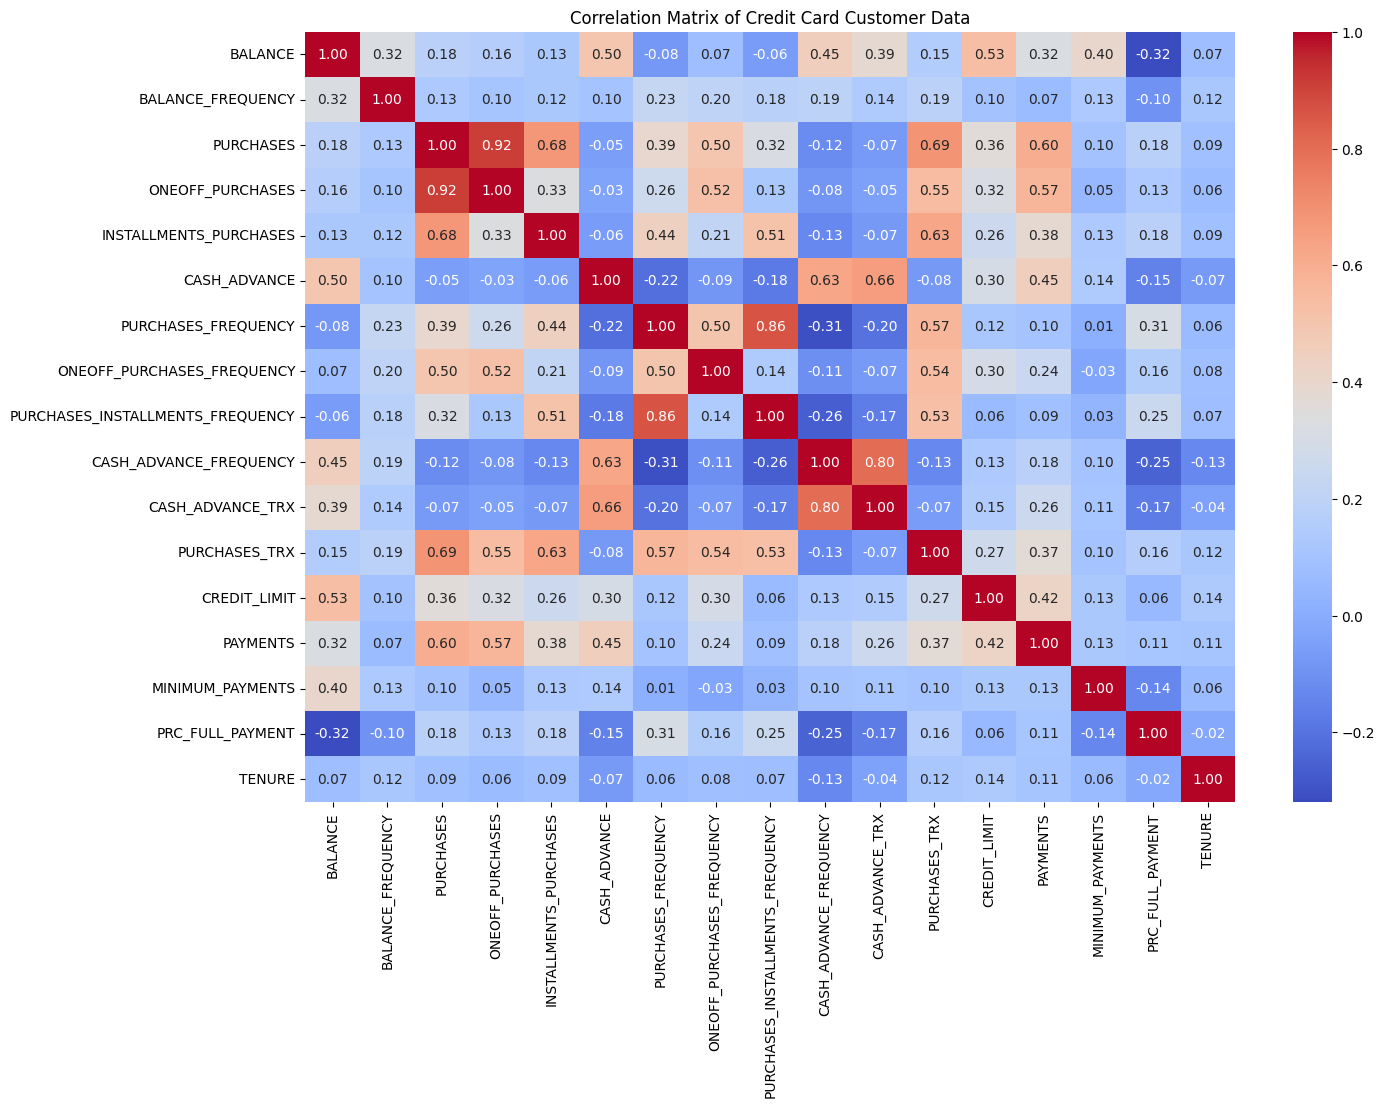

In [46]:

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Credit Card Customer Data")
plt.show()



In [48]:
# Identify redundant features using a correlation threshold of 0.8
threshold = 0.8
correlation_matrix = data.corr()

# Find pairs of highly correlated features based on the threshold
redundant_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            redundant_features.append(colname)

# Output redundant features
print("Redundant features:", redundant_features)

data = data.drop(columns=redundant_features)

Redundant features: ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [50]:
# Standardize the dataset using z-score normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame for ease of use
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Display the first few rows of the standardized data
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


Why is it important to standardize the data before applying PCA?
<br>
Answer:
Standardizing the data before applying PCA is crucial because PCA is sensitive to the variance of each feature. Features with larger scales or higher variances would dominate the principal components, potentially skewing the results. By standardizing the data, we ensure that all features contribute equally to the analysis, allowing PCA to focus on the underlying structure of the data rather than the feature scales. This makes the principal components more meaningful and allows for fair comparisons across all dimensions.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer:

StandardScaler: This class standardizes features by removing the mean and scaling to unit variance (z-score normalization). It transforms data so that each feature has a mean of 0 and a standard deviation of 1

Normalizer: This class scales each sample (row) individually to have unit norm (typically L2 norm).

For PCA, StandardScaler is generally the better choice because PCA is sensitive to variances across features. By standardizing, we allow PCA to analyze the relative variance structure across all features

## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [51]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        # Center the data by subtracting the mean
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Calculate the covariance matrix of the centered data
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Calculate eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Keep only the top 'n_components' eigenvalues and eigenvectors
        if self.n_components:
            eigenvectors = eigenvectors[:, :self.n_components]
            eigenvalues = eigenvalues[:self.n_components]

        # Store the principal components (eigenvectors) and explained variance ratio
        self.components = eigenvectors
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio = eigenvalues / total_variance

    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        # Center the data by subtracting the mean
        X_centered = X - self.mean

        # Project the data onto the principal components
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components


### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer:

To explain 75% of the variance, 5 components are needed. This is visualized by plotting the cumulative explained variance, where the curve reaches or surpasses the 75% threshold at the sixth component.

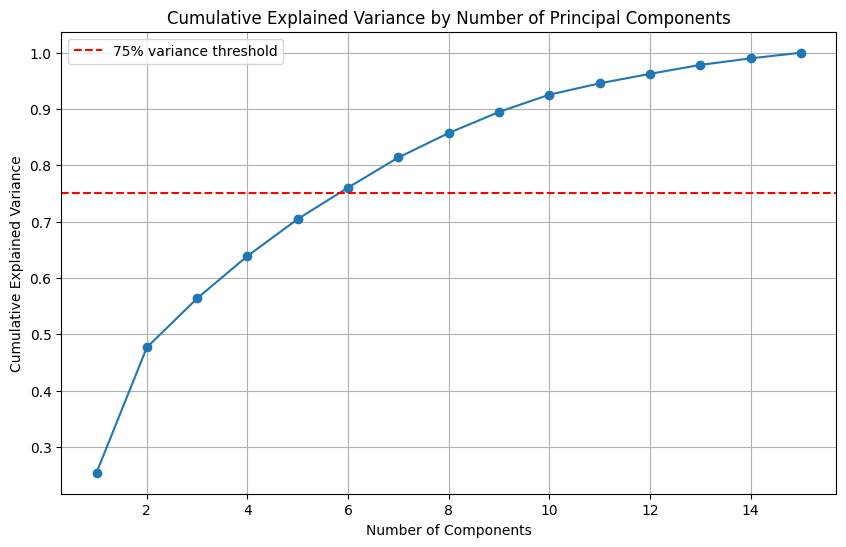

Number of components needed to explain 75% of the variance: 6
Cumulative explained variance percentages:
 [25.4, 47.7, 56.4, 63.9, 70.5, 76.1, 81.4, 85.7, 89.5, 92.6, 94.6, 96.3, 97.8, 99.0, 100.0]


In [53]:


# Instantiate the CustomPCA class, fit it to the standardized data, and get explained variance ratio
pca = CustomPCA()
pca.fit(data_scaled)
explained_variance_ratio = pca.get_explained_variance_ratio()

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.axhline(y=0.75, color='r', linestyle='--', label='75% variance threshold')
plt.legend()
plt.grid(True)
plt.show()

# Determine the number of components needed to explain 75% of the variance
n_components_75 = np.argmax(cumulative_variance >= 0.75) + 1
print(f"Number of components needed to explain 75% of the variance: {n_components_75}")

# Calculate the cumulative explained variance as percentages
cumulative_variance_percentage = np.cumsum(explained_variance_ratio) * 100
cumulative_variance_percentage = np.round(cumulative_variance_percentage, 1)  # Round to one decimal place

# Display the cumulative explained variance as a list
print("Cumulative explained variance percentages:\n", cumulative_variance_percentage.tolist())


Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [55]:
# Select the first 6 components based on the 75% variance threshold
n_components_75 = 5
pca_transformed_data = pca.transform(data_scaled)[:, :n_components_75]

# Build a new DataFrame with the selected components
pca_df = pd.DataFrame(pca_transformed_data, columns=[f"PC{i+1}" for i in range(n_components_75)])

# Save the new DataFrame to a CSV file
pca_df.to_csv('pca_output.csv', index=False)

# Display the first few rows of the new DataFrame
pca_df.head()


,PC1,PC2,PC3,PC4,PC5
0,1.731242,0.824084,-0.384320,-0.451623,-0.087766
1,0.301398,-2.533638,0.621582,-0.939313,-0.794456
2,-1.194199,0.887568,-1.184455,1.129115,-1.152626
3,0.930140,0.030106,-0.111213,-1.309452,-0.505452
4,1.499511,0.517780,-0.794300,-0.125376,-0.253049


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

Correlation matrix of the principal components:
               PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00 -2.251519e-16  1.294231e-16  2.881387e-16 -2.740237e-16
PC2 -2.251519e-16  1.000000e+00  4.532074e-17  3.846281e-17  1.014194e-16
PC3  1.294231e-16  4.532074e-17  1.000000e+00  6.046125e-17 -2.070506e-16
PC4  2.881387e-16  3.846281e-17  6.046125e-17  1.000000e+00  4.957884e-16
PC5 -2.740237e-16  1.014194e-16 -2.070506e-16  4.957884e-16  1.000000e+00


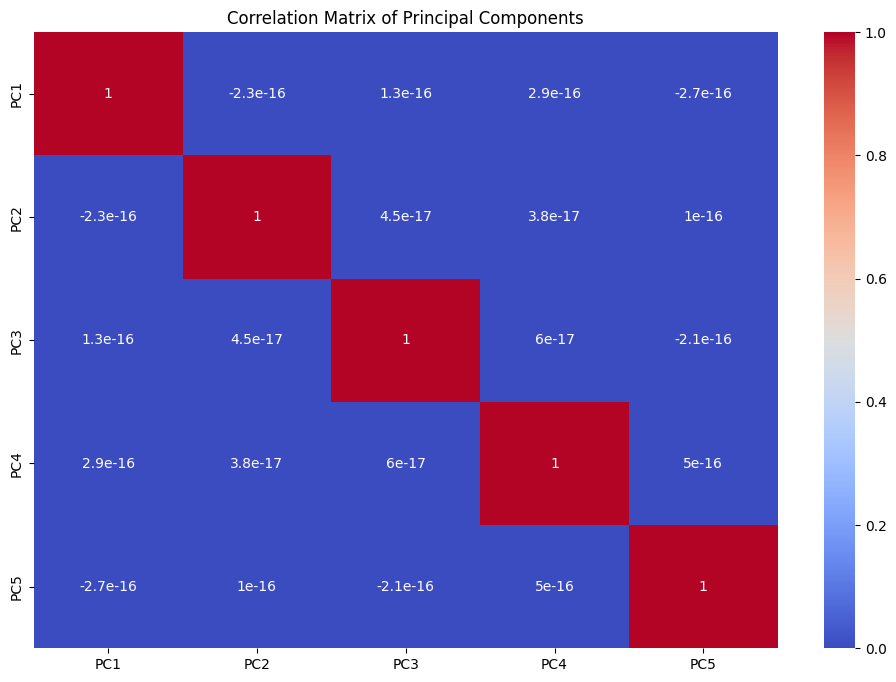

In [59]:
# Calculate the correlation matrix for the principal components to check orthogonality
correlation_matrix_pca = pca_df.corr()

# Display the correlation matrix
print("Correlation matrix of the principal components:\n", correlation_matrix_pca)

# Visualize the correlation matrix to confirm orthogonality
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_pca, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Principal Components")
plt.show()


## KMeans (45 points)
Implement kmeans from scratch.

In [60]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        np.random.seed(self.random_state)

        # Step 1: Initialize centroids by selecting random samples from X
        initial_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[initial_indices]

        for _ in range(self.max_iter):
            # Step 2: Assign each data point to the closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)

            # Step 3: Update centroids as the mean of assigned points
            new_centroids = np.array([X[self.labels_ == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check for convergence (if centroids do not change)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

        # Step 4: Calculate final inertia
        self.inertia_ = self._calculate_inertia(X)

        return self

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        # Sum of squared distances from each point to its assigned centroid
        inertia = 0.0
        for k in range(self.n_clusters):
            cluster_points = X[self.labels_ == k]
            inertia += np.sum((cluster_points - self.centroids[k]) ** 2)
        return inertia


### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

In [61]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)

    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(pca_df.values)

    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)



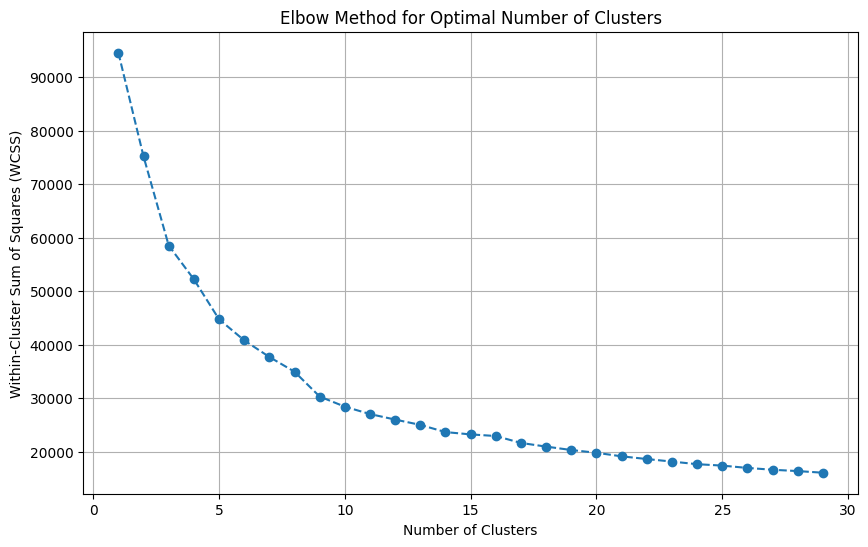

In [68]:
# Plot the Elbow curve using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), WCSS, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid(True)
plt.show()


Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [78]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters (5 clusters based on elbow method)
optimal_clusters = 5
kmeans_pca = CustomKMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_pca.fit(pca_df.values)

# Assign cluster labels to each observation
pca_df['segment'] = kmeans_pca.labels_

# Display the first few rows of the DataFrame with the new segment column
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,segment
0,1.731242,0.824084,-0.384320,-0.451623,-0.087766,2
1,0.301398,-2.533638,0.621582,-0.939313,-0.794456,1
2,-1.194199,0.887568,-1.184455,1.129115,-1.152626,3
3,0.930140,0.030106,-0.111213,-1.309452,-0.505452,2
4,1.499511,0.517780,-0.794300,-0.125376,-0.253049,2


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

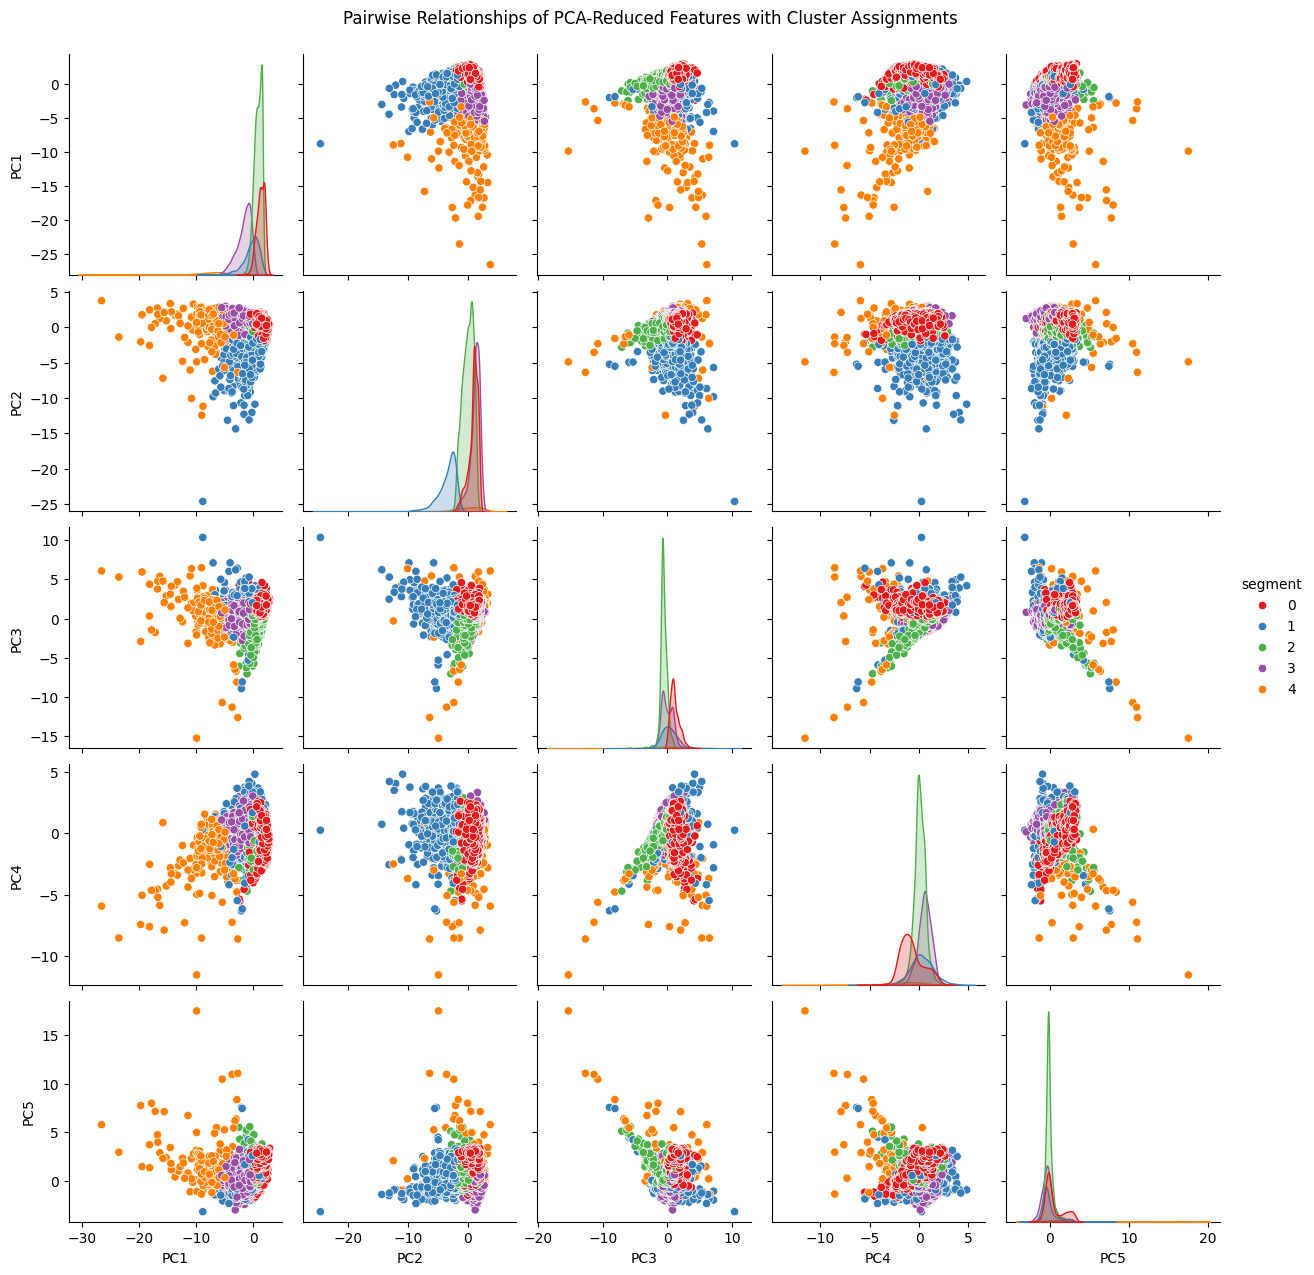

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize pairwise relationships of the PCA-reduced features with cluster assignments
# Set a specific palette, use KDE for diagonal, and plot only the lower triangle
sns.pairplot(pca_df, hue="segment", palette="Set1", diag_kind="kde", markers='o')

# Adjust the title position to match your style
plt.suptitle("Pairwise Relationships of PCA-Reduced Features with Cluster Assignments", y=1.02)
plt.show()


So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


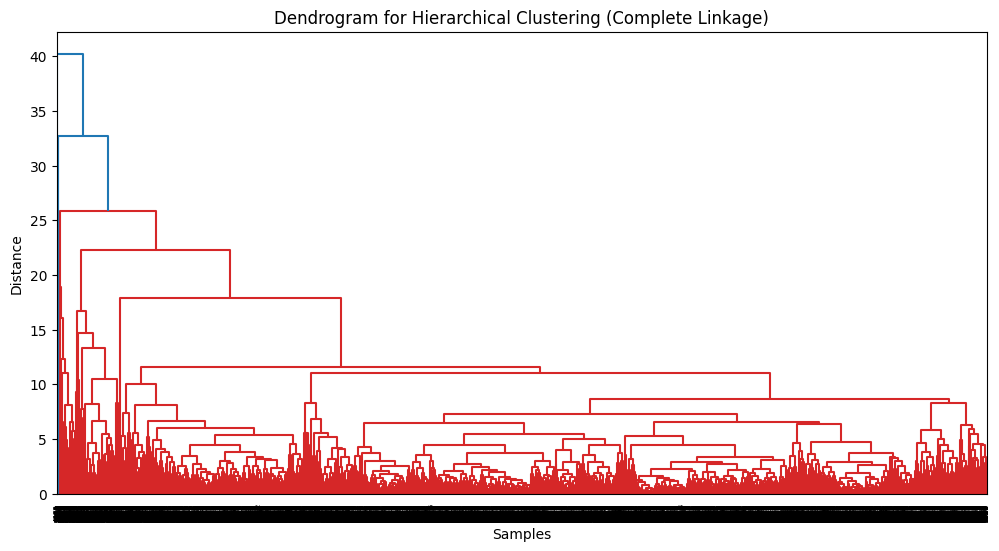

In [73]:
# Perform hierarchical clustering on the PCA-reduced dataset with complete linkage
linked = linkage(pca_df.iloc[:, :-1], method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title("Dendrogram for Hierarchical Clustering (Complete Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

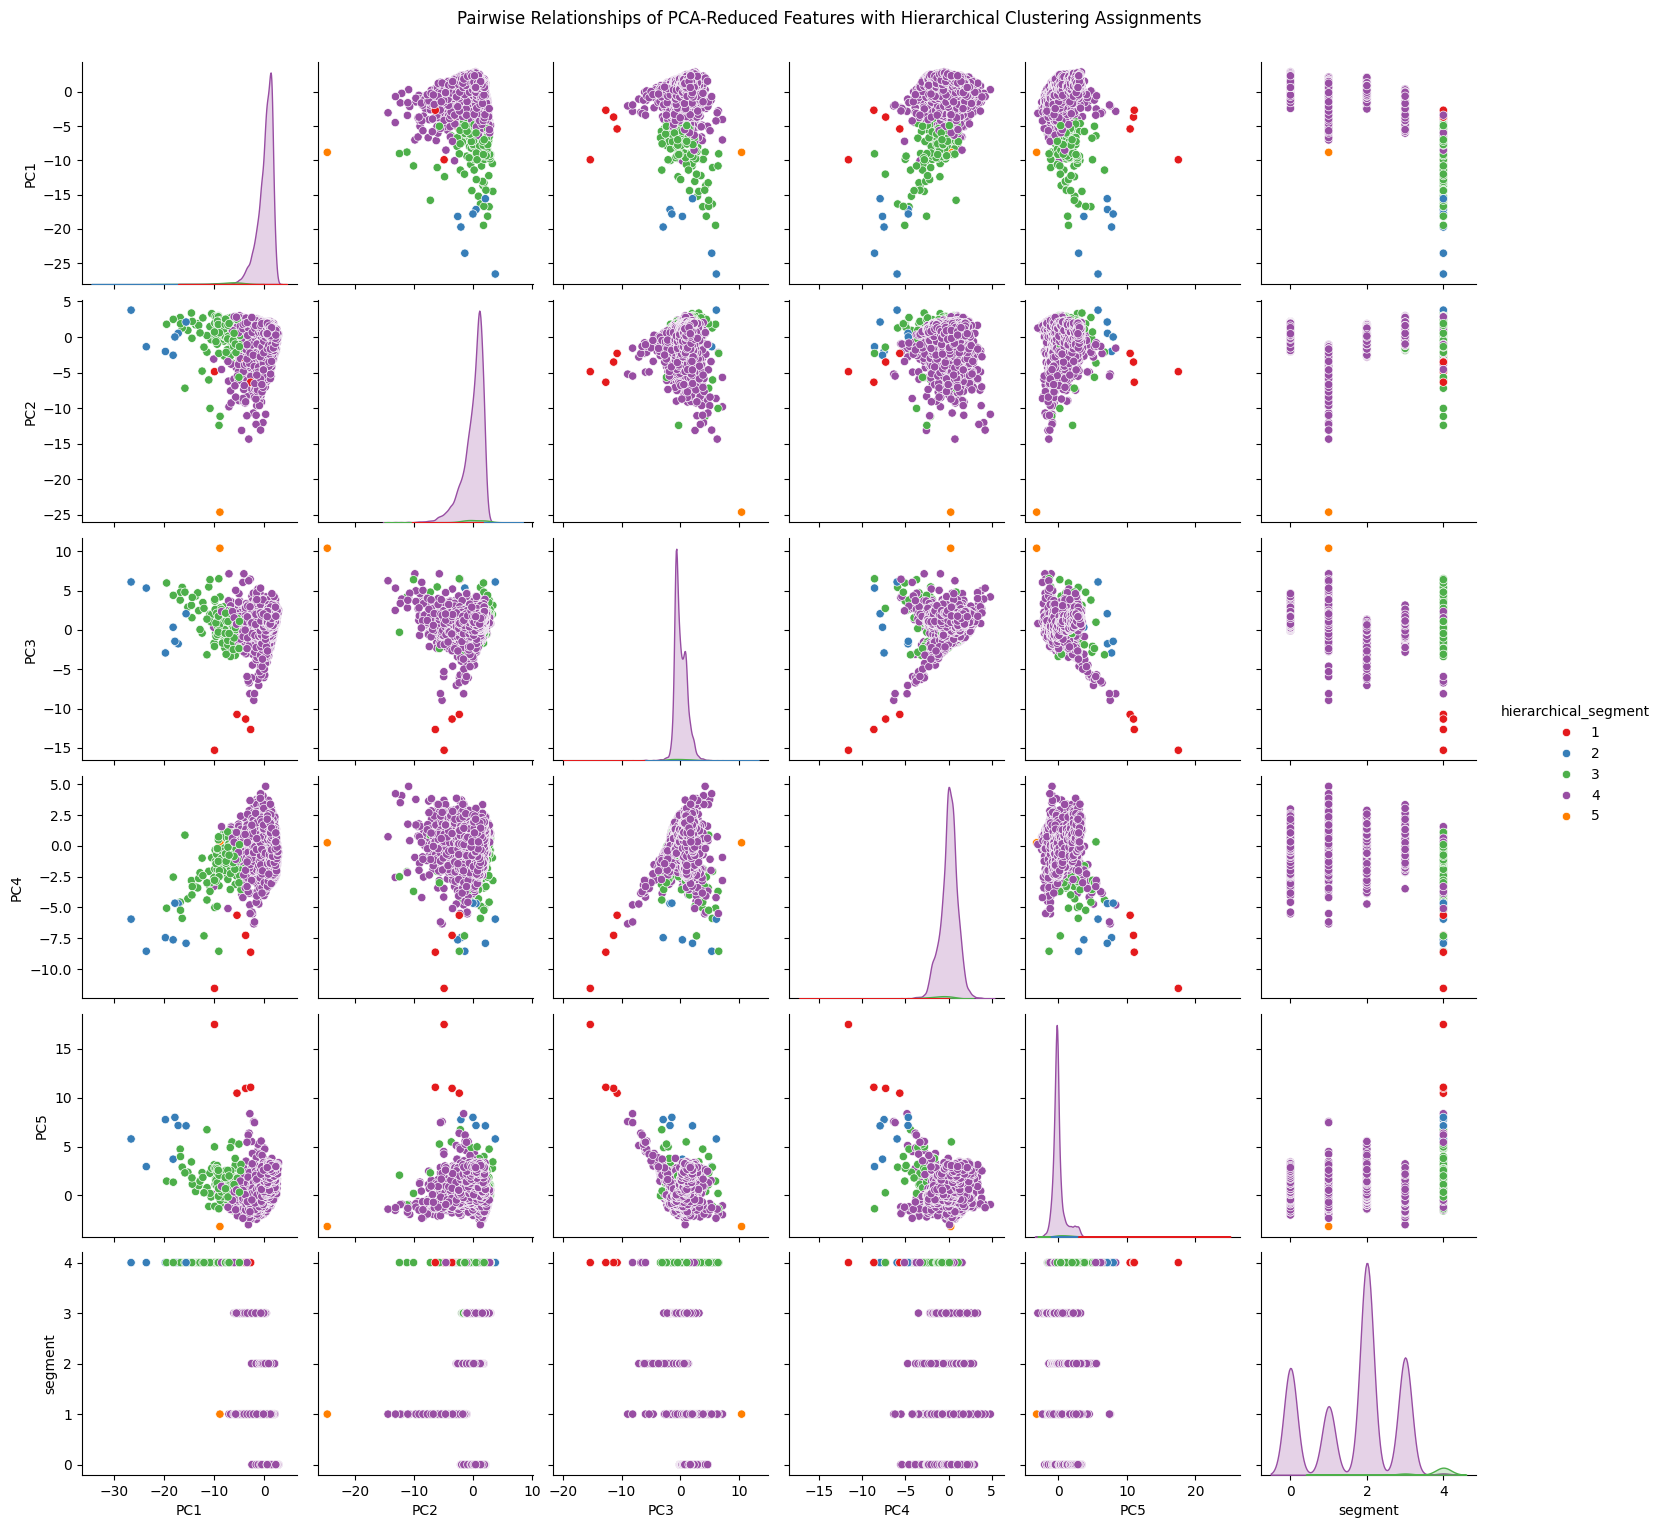

In [80]:
# Choose a threshold to form 5 clusters using fcluster
num_clusters = 5
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Assign the cluster labels to the PCA DataFrame in a new 'hierarchical_segment' column
pca_df['hierarchical_segment'] = cluster_labels

# Visualize the results using pairplot, including the "hierarchical_segment" column as a feature
sns.pairplot(pca_df, hue="hierarchical_segment", palette="Set1", diag_kind="kde", markers='o', corner=False)
plt.suptitle("Pairwise Relationships of PCA-Reduced Features with Hierarchical Clustering Assignments", y=1.02)
plt.show()
